In [1]:
# import packages
from matplotlib import rcParams
rcParams['figure.dpi'] = 120
rcParams["savefig.dpi"] = 120
rcParams['figure.facecolor'] = 'w'

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from lmfit import Model

import warnings
warnings.filterwarnings('ignore')

# path joining version for other paths
notebook_path = os.path.abspath('h3p_scam_movie.ipynb' + "/../")
filepath = os.path.join(os.path.dirname(notebook_path), 'scam/')
figs_dir = os.path.abspath('./../figures')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])

# load fits data
jun02i_scam = []

start_jun02i = 1 # fits index start, min >= 1, max <= n
end_jun02i = 1904 # fits index end, min >= n, max <= 9999

# obtain all scam fits files
for i in range(filesize):
    if i >= 0 and i < 9:
        hdu_data = fits.getdata(filepath + 'jun02i000' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
    elif i >= 9 and i < 99:
        hdu_data = fits.getdata(filepath + 'jun02i00' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
    elif i >= 99 and i < 999: 
        hdu_data = fits.getdata(filepath + 'jun02i0' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
    elif i >= 999:
        hdu_data = fits.getdata(filepath + 'jun02i' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
jun02i_scam_array = np.array(jun02i_scam)

In [2]:
figs_dir = os.path.abspath('./../figures')
figs_dir

'/Users/RuoyanWang/Documents/LEICESTER/h3p/02jun17/figures'

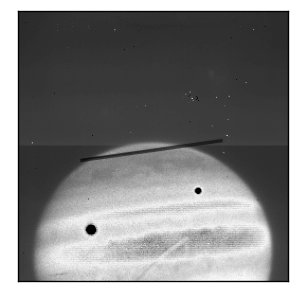

In [8]:
fig = plt.figure(figsize=(5,5), tight_layout=True)

# fig.add_subplot(121)
# plt.imshow(jun02i_scam_array[323], cmap='gist_gray')
# plt.title('a)', loc='left')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_visible(False)
# plt.gca().yaxis.set_visible(False)

fig.add_subplot(121)
# plt.title('b)', loc='left')
plt.imshow(jun02i_scam_array[480], cmap='gist_gray', norm=colors.PowerNorm(gamma=0.5))
plt.plot([60.2, 192], [114, 132.5], 'k-', lw=2, alpha=0.5)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.savefig(figs_dir+'/scam.png', dpi=400, bbox_inches='tight', facecolor='white')

In [95]:
# Generate png from fits and save all
for i in range(len(jun02i_scam_array)):
    if i >= 0 and i < 9:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i000'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i000'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()
    elif i >= 9 and i < 99:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i00'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i00'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()
    elif i >= 99 and i < 999:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i0'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i0'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()
    elif i >= 999:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()

In [4]:
os.path.dirname(notebook_path)

'/Users/RuoyanWang/Documents/LEICESTER/h3p/02jun17'

In [8]:
# Make video from png
import ffmpeg
(
    ffmpeg
    .input(os.path.dirname(notebook_path) + '/images/jupiter/*.png', pattern_type='glob', framerate=20)
    .output(os.path.dirname(notebook_path) +'/images/jun02i_new.gif', pix_fmt='rgb24')
    .overwrite_output()
    .run()
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/concourse/worker/volumes/live/d5b9ea1c-8223-4ff6-7416-83e6b4cd6874/volume/ffmpeg_1587154914508/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilt

(None, None)